<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula15a_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analisys

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
print(len(set(y)))

(569, 30)
2


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(569, 30)


In [20]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908878e-08
 6.99641648e-09 4.78318305e-09 2.93549213e-09 1.41684926e-09
 8.29577731e-10 5.20405880e-10 4.08463983e-10 3.63313376e-10
 1.72849736e-10 1.27487508e-10 7.72682973e-11 6.28357715e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666944e-12 1.55344680e-12]
0.9999999999999997


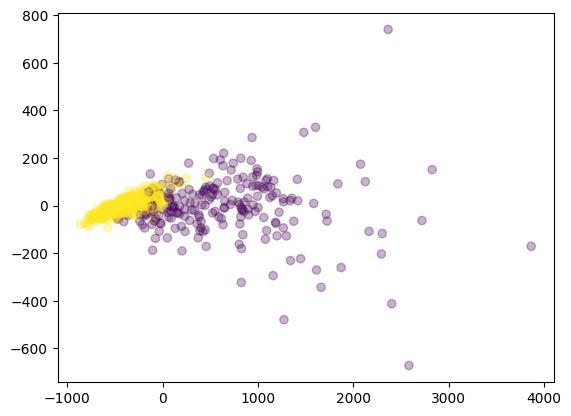

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.3)
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier()
cv_results = cross_validate(rf, X, y)
print(cv_results['test_score'], cv_results['test_score'].mean())

[0.92982456 0.94736842 0.98245614 0.95614035 0.98230088] 0.9596180717279925


In [26]:
n_most_important_new_features = int(X.shape[1]*0.5)
print(n_most_important_new_features)
rf = RandomForestClassifier()
cv_results = cross_validate(rf, X_pca[:,:n_most_important_new_features], y)
print(cv_results['test_score'], cv_results['test_score'].mean())

15
[0.92105263 0.92982456 0.96491228 0.95614035 0.94690265] 0.943766495885732


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv_results = cross_validate(knn, X, y)
print(cv_results['test_score'], cv_results['test_score'].mean())

[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354] 0.9279459711224964


In [28]:
knn = KNeighborsClassifier()
cv_results = cross_validate(knn, X_pca[:,:n_most_important_new_features], y)
print(cv_results['test_score'], cv_results['test_score'].mean())

[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354] 0.9279459711224964


In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
cv_results = cross_validate(lr, X, y)
print(cv_results['test_score'], cv_results['test_score'].mean())

[0.93859649 0.94736842 0.98245614 0.92982456 0.95575221] 0.9507995652848935


In [31]:
lr = LogisticRegression(max_iter=5000)
cv_results = cross_validate(lr, X_pca[:,:n_most_important_new_features], y)
print(cv_results['test_score'], cv_results['test_score'].mean())

[0.93859649 0.94736842 0.98245614 0.92982456 0.95575221] 0.9507995652848935


#PCA drawbacks

(100, 2)


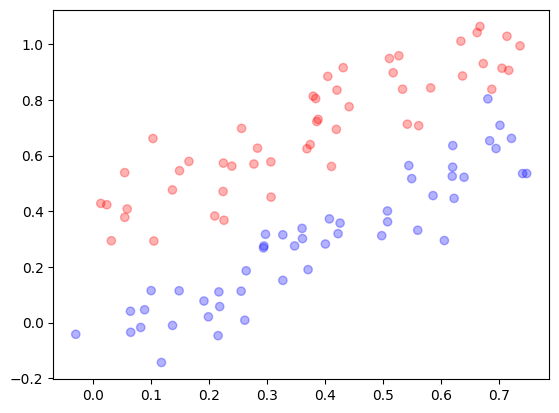

In [128]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100,
                  centers=[[0.1, 0.0], [0.1, 0.4],
                           [0.2, 0.1], [0.2, 0.5],
                           [0.3, 0.2], [0.3, 0.6],
                           [0.4, 0.3], [0.4, 0.7],
                           [0.5, 0.4], [0.5, 0.8],
                           [0.6, 0.5], [0.6, 0.9],
                           [0.7, 0.6], [0.7, 1.0]],
                  n_features=2,
                  cluster_std=0.075,
                  random_state=42)
y = y % 2
print(X.shape)


from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0)] # Blue -> Green -> Red
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, cmap=cmap)
plt.show()

1.0


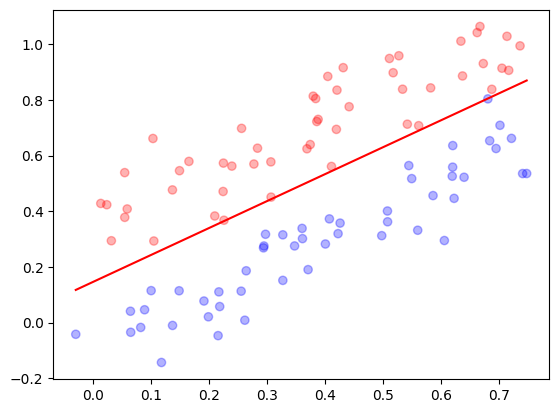

In [129]:
from sklearn.linear_model import Perceptron
import numpy as np

model = Perceptron().fit(X, y)
y_pred = model.predict(X)
print((y == y_pred).mean())

def plot_hiperplano(vector, intercept=0, xs = [0, 1]):
  xs = np.array(xs)
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'r-')

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, cmap=cmap)
plot_hiperplano(model.coef_[0], model.intercept_[0], [X[:,0].min(), X[:,0].max()])
plt.show()

[0.84627053 0.15372947]


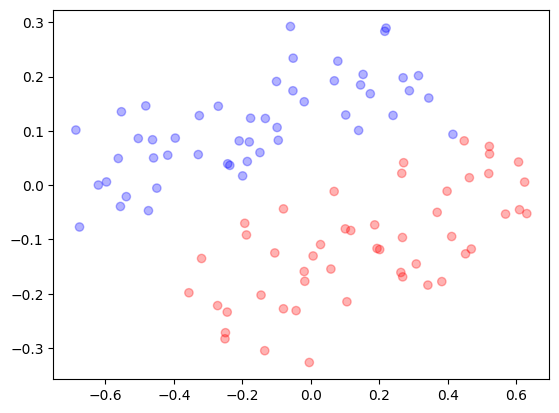

In [130]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.3, cmap=cmap)
plt.show()

0.47


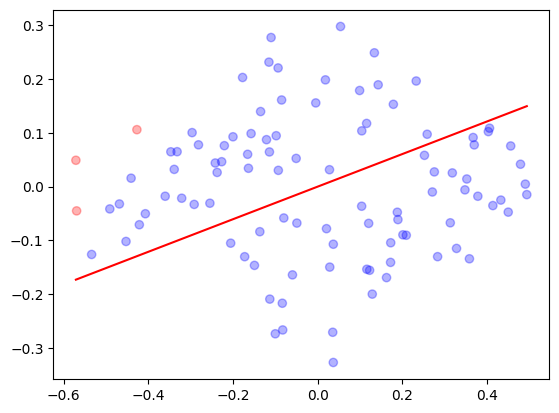

In [123]:

model.fit(X_pca, y)
y_pred = model.predict(X)
print((y == y_pred).mean())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, alpha=0.3, cmap=cmap)
plot_hiperplano(model.coef_[0],
                model.intercept_[0], [X_pca[:,0].min(), X_pca[:,0].max()])
plt.show()

In [115]:
pca.explained_variance_ratio_

array([0.82473735, 0.17526265])